In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install surprise



     |████████████████████████████████| 11.8MB 8.0MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617558 sha256=3afbbb5e95d167d3520cc497daca5c3129822b4ed404e568952a5b14d696c4ef
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD,accuracy
from sklearn.model_selection import train_test_split


In [ ]:
data_dir = "/content/drive/MyDrive/cs686/ml-latest-small/"
movies_dir=data_dir+"movies.csv"
rating_dir = data_dir+"ratings.csv"
tags_dir = data_dir+"tags.csv"
links_dir=data_dir+"links.csv"
credits_dir = data_dir+"credits.csv"
movie_meta_dir = data_dir + "movies_metadata.csv"
keyword_dir = data_dir + "keywords.csv"

movies = pd.read_csv(movies_dir)
rating = pd.read_csv(rating_dir)
tags = pd.read_csv(tags_dir)
links = pd.read_csv(links_dir)
credits=pd.read_csv(credits_dir)
movies_metadata = pd.read_csv(movie_meta_dir)
keywords = pd.read_csv(keyword_dir)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data exploratory + data visualization

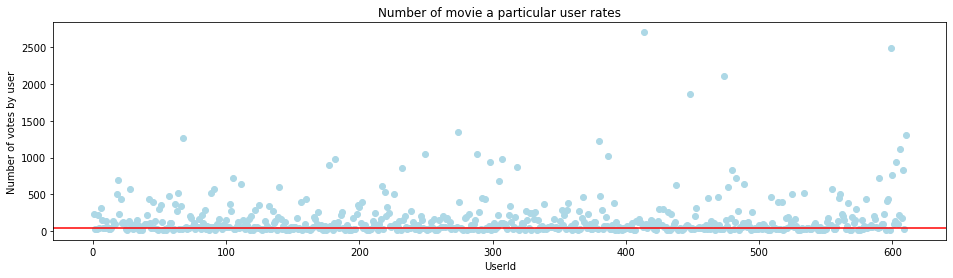

In [ ]:
no_user_voted = merge_rating.groupby('movieId')['rating'].agg('count')
no_movies_voted = merge_rating.groupby('userId')['rating'].agg('count')
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='lightblue')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('Number of votes by user')
plt.title('Number of movie a particular user rates')
plt.show()

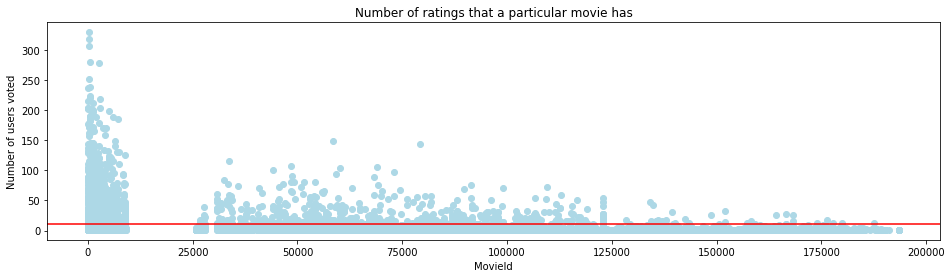

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='lightblue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('Number of users voted')
plt.title('Number of ratings that a particular movie has')

plt.show()

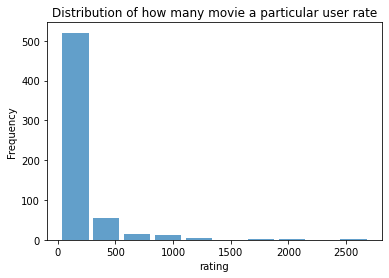

In [ ]:
x =len(rating.T)-rating.T.isin([0]).sum()
plt.hist(x,alpha=0.7, rwidth=0.85)
plt.title("Distribution of how many movie a particular user rate")
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.show()

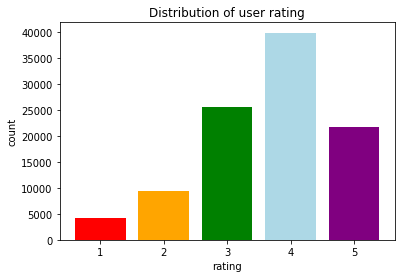

In [ ]:
all_rating = merge_rating['rating']
stats_rating = [0,0,0,0,0]
for rate in all_rating:
  if (rate<=1):
    stats_rating[0]+=1
  if (rate<=2 and rate>1):
     stats_rating[1]+=1
  if (rate<=3 and rate>2):
     stats_rating[2]+=1
  if (rate<=4 and rate>3):
     stats_rating[3]+=1
  if (rate<=5 and rate>4):
     stats_rating[4]+=1


bars = ('1', '2', '3', '4', '5')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, stats_rating,color=["red","orange","green","lightblue","purple"])
plt.title("Distribution of user rating")
plt.xlabel("rating")
plt.ylabel("count")
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

In [ ]:
userId = merge_rating["userId"].ravel()
movieId = merge_rating["movieId"].ravel()

Save/ read the new extracted features from the google drive

In [ ]:
#Save the file into drive 
# merge_rating.to_csv('new_rating.csv')
# !cp new_rating.csv "drive/My Drive/cs686/ml-latest-small"
merge_rating= data_dir + "new_rating.csv"
merge_rating = pd.read_csv(merge_rating)
merge_rating

,Unnamed: 0,movieId,title,userId,rating,matrix_fact_predit,similarMovie1,similarMovie2,similarMovie3,similarUser1,similarUser2,similarUser3,user_rating_avg,movie_rating_avg
0,0,1,Toy Story (1995),1,4.0,4.765211,4.0,4.0,5.0,5.0,3.0,4.0,4.366379,3.92093
1,1,1,Toy Story (1995),5,4.0,3.889968,5.0,3.0,3.0,4.0,5.0,4.0,3.636364,3.92093
2,2,1,Toy Story (1995),7,4.5,4.720856,4.5,4.5,4.0,3.5,5.0,4.0,3.230263,3.92093
3,3,1,Toy Story (1995),15,2.5,4.621590,2.0,3.5,1.0,3.0,3.0,4.0,3.448148,3.92093
4,4,1,Toy Story (1995),17,4.5,4.956737,4.0,3.5,5.0,2.5,4.0,3.0,4.209524,3.92093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0,3.719750,4.0,4.0,4.0,4.0,4.0,4.0,3.705224,4.00000
100832,100832,193583,No Game No Life: Zero (2017),184,3.5,3.757619,3.5,3.5,3.5,3.5,3.5,3.5,3.705224,3.50000
100833,100833,193585,Flint (2017),184,3.5,3.590668,3.5,3.5,3.5,3.5,3.5,3.5,3.705224,3.50000
100834,100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5,3.555727,3.5,3.5,3.5,3.5,3.5,3.5,3.705224,3.50000


Split the training dataset and testing dataset



In [ ]:
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5))

# # # create the traindata from the data frame
# train_data_mf = Dataset.load_from_df(merge_rating[['userId', 'movieId', 'rating']], reader)
# trainset = train_data_mf.build_full_trainset()


In [ ]:
from sklearn.model_selection import train_test_split


# movie_training = merge_rating[['similarUser1','similarUser2','similarUser3','similarMovie1','similarMovie2','similarMovie3']]
#movie_training = merge_rating[['similarMovie1','similarMovie2','similarMovie3']]
#movie_training = merge_rating[['user_rating_avg','movie_rating_avg']]

#movie_training = merge_rating[['similarMovie1','similarMovie2','similarMovie3','user_rating_avg','movie_rating_avg']]

#movie_training = merge_rating[['similarMovie1','similarMovie2','similarMovie3','similarUser1','similarUser2','similarUser3','user_rating_avg','movie_rating_avg']]

movie_rating = merge_rating["rating"]
trainingX,testingX,trainingY,testingY = train_test_split(merge_rating,movie_rating, test_size=.10)
trainingId = trainingX.index
testingId=testingX.index
trainingX=trainingX[['similarMovie1','similarMovie2','similarMovie3','similarUser1','similarUser2','similarUser3','user_rating_avg','movie_rating_avg']]
testingX =testingX[['similarMovie1','similarMovie2','similarMovie3','similarUser1','similarUser2','similarUser3','user_rating_avg','movie_rating_avg']]

print(trainingX.shape,trainingY.shape)
print(testingX.shape,trainingY.shape)

(90752, 8) (90752,)
(10084, 8) (90752,)


In [ ]:
trainingset=merge_rating[merge_rating.index.isin(trainingId)]
testingset = merge_rating[merge_rating.index.isin(testingId)]

In [ ]:
#trainingset, testingset = train_test_split(merge_rating, test_size=.10)
#trainingset_movieid= trainingset['movieId']
#testingset_movieid= testingset['movieId']
alldata = Dataset.load_from_df(trainingset[['userId', 'movieId', 'rating']], reader)
data = alldata.build_full_trainset()
data

In [ ]:
# create the traindata from the data frame
train_data_mf = Dataset.load_from_df(trainingset[['userId', 'movieId', 'rating']], reader)
# create the traindata from the data frame
test_data_mf = Dataset.load_from_df(testingset[['userId', 'movieId', 'rating']], reader)
trainset = train_data_mf.build_full_trainset()


Baseline model experiment

In [ ]:
from surprise.model_selection import cross_validate

algo = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
# algo.fit(trainset)
cross_validate(algo, train_data_mf, measures=['RMSE', 'MAE'], cv=5, verbose=True)
#cross_validate(algo, alldata, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:

#getting predictions of train set
train_preds = algo.test(trainset.build_testset())
train_pred_mf = np.array([pred.est for pred in train_preds])
accuracy.rmse(train_preds)
accuracy.mae(train_preds)


RMSE: 0.6935
MAE:  0.5321


0.5321328159898336

In [ ]:
# prediction of rating on testing set 
test_preds=algo.test(test_data_mf.build_full_trainset().build_testset())
test_preds_mf = np.array([pred.est for pred in test_preds])
print(len(test_preds_mf))
accuracy.rmse(test_preds)
accuracy.mae(test_preds)



10084
RMSE: 0.8710
MAE:  0.6674


0.6674159699882465

Collaborative filtering with feature extraction







In [ ]:
def getUserAvg(matrix):
  sum_of_ratings = matrix.sum(axis=1).ravel()
  is_rated = matrix!=0
  no_of_ratings = is_rated.sum(axis=1).ravel()
  average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(matrix.shape[0]) 
                                    if no_of_ratings[i] !=0}
  return average_ratings

def getMovieAvg(matrix):
  sum_of_ratings = matrix.sum(axis=0).ravel()
  is_rated = matrix!=0
  no_of_ratings = is_rated.sum(axis=0).ravel()
  average_ratings = { matrix.columns.values[i] : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(len(matrix.columns.values))
                                    if no_of_ratings[i] !=0} 
  return average_ratings
  
temp = dict()
temp["user_rating_avg"] = getUserAvg(rating)
temp["movie_rating_avg"] = getMovieAvg(rating)

user_avg = []
movie_avg = []
for id in userId:
  user_avg.append(temp["user_rating_avg"][id-1])
for id in movieId:
  movie_avg.append(temp["movie_rating_avg"][id])
merge_rating["user_rating_avg"] = user_avg
merge_rating["movie_rating_avg"]=movie_avg
merge_rating


In [ ]:
import collections
merge_rating=pd.merge(movies,rating).drop(['genres','timestamp'],axis=1)

# Sparse matrix 
rating =merge_rating.pivot_table(index=["userId"],columns=['movieId'],values="rating").fillna(0)
merge_rating

dictionary =collections.defaultdict(int)
for movie in merge_rating["title"]:
  dictionary[movie]+=1
small=10
moviename=""
for key,val in dictionary.items():
  if val<small:
    small=val
    moviename=key

print("movie",small,moviename)

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

user_similarity = 1 - pairwise_distances(rating, metric="cosine" )
user_similarity = pd.DataFrame( user_similarity )
user_similarity

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,0.132499,0.016458,0.092971,0.113238,0.160689,0.169858,0.264358,0.214868,0.325376,0.160969,0.153162,0.050691,0.106669,0.155193,0.099261,0.105791,0.238933,0.202866,0.145251,0.099781,0.164454,0.146211,0.151945,0.083544,0.074508,0.071673,0.144736,0.138588,0.329782,0.094755,...,0.090224,0.131072,0.253480,0.093450,0.062668,0.051803,0.317319,0.000000,0.141129,0.249326,0.057399,0.048914,0.052175,0.100406,0.114076,0.123280,0.122782,0.183922,0.118112,0.324766,0.136809,0.143934,0.174413,0.141960,0.110558,0.123713,0.312843,0.011280,0.282412,0.291272,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
1,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,0.044419,0.000000,0.043918,0.016901,0.119778,0.093728,0.103755,0.166253,0.012571,0.014137,0.090880,0.144635,0.013597,0.129902,0.226008,0.000000,0.000000,0.058145,0.104059,0.149324,0.000000,0.017807,0.032428,0.043299,0.000000,0.054012,0.028500,0.023147,0.000000,0.017446,...,0.000000,0.032675,0.167959,0.035531,0.000000,0.000000,0.014870,0.000000,0.000000,0.061953,0.136703,0.219315,0.043620,0.000000,0.127551,0.089562,0.000000,0.055900,0.026429,0.056348,0.036147,0.030684,0.062033,0.013125,0.000000,0.104568,0.011986,0.048508,0.098000,0.023248,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
2,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,0.000000,0.000000,0.000000,0.003064,0.017251,0.032299,0.009813,0.028241,0.019142,0.008756,0.004017,0.003070,0.003081,0.002592,0.005100,0.000000,0.002332,0.029771,0.005974,0.000000,0.003507,0.015494,0.007156,0.000736,0.000000,0.000000,0.000000,0.004196,0.003639,0.002530,...,0.020899,0.008056,0.000000,0.000000,0.000000,0.029830,0.039894,0.000000,0.005749,0.033121,0.008561,0.000000,0.000000,0.000000,0.000000,0.000986,0.015793,0.003923,0.004791,0.027418,0.000000,0.000000,0.006460,0.001983,0.000000,0.025873,0.028970,0.000000,0.039539,0.013143,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
3,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,0.054767,0.049945,0.076949,0.048989,0.071551,0.164761,0.145058,0.123217,0.206053,0.113755,0.053014,0.043403,0.093971,0.071690,0.032862,0.061832,0.128954,0.135593,0.061308,0.058140,0.126182,0.200597,0.167247,0.045571,0.050148,0.113807,0.061031,0.090125,0.240976,0.053436,...,0.018553,0.182857,0.125627,0.064559,0.061035,0.005932,0.169440,0.000000,0.098777,0.148584,0.043871,0.047619,0.048474,0.041246,0.088289,0.064095,0.138766,0.049146,0.064485,0.219298,0.116111,0.068196,0.217116,0.082614,0.091974,0.107908,0.275436,0.016054,0.201610,0.211921,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
4,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,0.183805,0.058860,0.017157,0.221711,0.110152,0.082171,0.162633,0.121313,0.098758,0.096474,0.058264,0.033074,0.066889,0.096215,0.040705,0.294282,0.100491,0.121894,0.068876,0.065534,0.068585,0.233932,0.282323,0.029953,0.311472,0.022065,0.303078,0.377773,0.152956,0.321077,...,0.020016,0.124806,0.129338,0.341347,0.049306,0.000000,0.122199,0.000000,0.182382,0.117199,0.057538,0.000000,0.124645,0.348215,0.029293,0.072713,0.154315,0.377256,0.230961,0.152971,0.000000,0.359595,0.171864,0.137990,0.073238,0.096181,0.116071,0.000000,0.098599,0.137053,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:

def get_similarUser(userId,movieId):
  topSimilarUserRating = []
  sim_scores = list(enumerate(user_similarity[userId-1]))
  # print("sim_scores",sim_scores)
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  userRateMovie = list(merge_rating[merge_rating['movieId']==movieId]['userId'])
  #find top similar user 
  sim_scores = sim_scores[1:]
  count=0
  
  for sim_user,score in sim_scores:
    if int(sim_user) in userRateMovie:
      
      #rate=list(merge_rating[merge_rating['movieId']==movieId][merge_rating['userId']==int(sim_user)]['rating'])[0]
      rate=list(merge_rating.loc[(merge_rating['movieId'] == movieId) & (merge_rating['userId']==sim_user)]["rating"])[0]
      topSimilarUserRating.append(rate)
      count+=1
    if count==3:
      return topSimilarUserRating
  while count!=3:
    userRating = list(merge_rating[merge_rating.userId==userId][merge_rating.movieId==movieId]["rating"])[0]
    topSimilarUserRating.append(userRating)
    count+=1
  return topSimilarUserRating


In [ ]:

user1=[]
user2=[]
user3=[]

for id in range(len(movieId)):
  simUser = get_similarUser(userId[id],movieId[id])
  user1.append(simUser[0])
  user2.append(simUser[1])
  user3.append(simUser[2])
print(len(user1),len(user2),len(user3))
  
merge_rating["similarUser1"] = user1
merge_rating["similarUser2"] = user2
merge_rating["similarUser3"] = user3

merge_rating


Content based recommendation system
1.Handle data - > combine the content/ meta data we want 
2.Then split the data to training data and testing data 

In [ ]:
invalidRow= []
for id in movies_metadata['id']:
  if(not id.isdigit()):
    invalidRow.append(id) 
print("invalidRow",invalidRow)
unique_index = pd.Index(list(movies_metadata['id']))
invalidRowIndex=[]
for id in invalidRow:
  invalidRowIndex.append(unique_index.get_loc(id))
print(invalidRowIndex)


invalidRow ['1997-08-20', '2012-09-29', '2014-01-01']
[19730, 29503, 35587]


In [ ]:
movies_metadata=movies_metadata.drop(invalidRowIndex)
movies_metadata.shape

(45463, 24)

In [ ]:
movies_metadata['id'] = movies_metadata['id'].astype('int')
links_small = links[links['tmdbId'].notnull()]['tmdbId'].astype('int')

movie_info_small = movies_metadata[movies_metadata['id'].isin(links_small)]
movie_info_small.shape


(9553, 24)

In [ ]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
movies_metadata['id'] = movies_metadata['id'].astype('int')
movies_metadata.shape

(45463, 24)

In [ ]:
movies_metadata = movies_metadata.merge(keywords,on="id")
movies_metadata = movies_metadata.merge(credits, on="id")

movies_metadata_small = movies_metadata[movies_metadata['id'].isin(links_small)]
movies_metadata_small.shape

(9657, 27)

In [ ]:
import ast
stemmer = SnowballStemmer('english')
features= ["genres","director","cast","keywords"]

#helper function for extracting value
def getDirector(crew):
  for member in crew:
    
    if (member['job']) == "Director":
      return member['name']
  return np.nan
def getMainCast(cast):
  if len(cast)>=3:
    return cast[:3]
  return cast
 
    
def checkValidKeyWords(keyword):
  newkeyword=[]
  for key in keyword:
    if key in keywordCount:
      newkeyword.append(key)
  
  return newkeyword
def stemKeyword(keyword):
  newkeyword=[]
  for key in keyword:
    newkeyword.append(stemmer.stem(key))
  return newkeyword

def combine_features(row):
  res=row['genres']+' '+row['director']+' '+row['keywords']+' '+row['cast']
  print(res)
  return res


In [ ]:
movie_info_small=movies_metadata_small

In [ ]:
# Escape the string 
movie_info_small['crew'] = movie_info_small['crew'].fillna('[]').apply(literal_eval).apply(lambda x: [i for i in x])
movie_info_small['cast'] = movie_info_small['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i for i in x])

movie_info_small['keywords'] = movie_info_small['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i for i in x])
movie_info_small['keywords'] = movie_info_small['keywords'].apply(lambda x: [i['name'] for i in x])
# Get the first 3 crew 
movie_info_small['cast'] = movie_info_small['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie_info_small['cast'] = movie_info_small['cast'].apply(getMainCast)
# Get the director
movie_info_small['director'] = movie_info_small['crew'].apply(getDirector)

movie_info_small['genres'] = movie_info_small['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i for i in x])
movie_info_small['genres']=movie_info_small['genres'].apply(lambda x: [i['name'] for i in x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
keywordCount = movie_info_small.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
keywordCount.name = 'keyword'
keywordCount = keywordCount.value_counts()
keywordCount=keywordCount[keywordCount>1]
movie_info_small['keywords']= movie_info_small['keywords'].apply(checkValidKeyWords)
movie_info_small['keywords']= movie_info_small['keywords'].apply(stemKeyword)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print("cast",movie_info_small['cast'].isnull().values.any())
print("keywords",movie_info_small['keywords'].isnull().values.any())
print("director",movie_info_small['director'].isnull().values.any())
print("genres",movie_info_small['genres'].isnull().values.any())

cast False
keywords False
director True
genres False


In [ ]:
for feature in features:
    movie_info_small[feature] = movie_info_small[feature].fillna('')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("cast",movie_info_small['cast'].isnull().values.any())
print("keywords",movie_info_small['keywords'].isnull().values.any())
print("director",movie_info_small['director'].isnull().values.any())
print("genres",movie_info_small['genres'].isnull().values.any())

cast False
keywords False
director False
genres False


In [ ]:
movie_info_small['cast'] = movie_info_small['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
movie_info_small['director'] = movie_info_small['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
movie_info_small['director'] = movie_info_small['director'].apply(lambda x: [x,x, x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:

movie_info_small['combine']=movie_info_small['genres']+movie_info_small['keywords']+movie_info_small['cast']+movie_info_small['director']
movie_info_small['combine']=movie_info_small['combine'].apply(lambda x:' '.join(x))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

cv=TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')

count_matrix = cv.fit_transform(movie_info_small['combine'])
cosine_sim=cosine_similarity(count_matrix,count_matrix)

In [ ]:
print(cosine_sim)

[[1.         0.00819442 0.00961418 ... 0.00132857 0.00347783 0.00485545]
 [0.00819442 1.         0.         ... 0.         0.         0.        ]
 [0.00961418 0.         1.         ... 0.00174356 0.00456415 0.        ]
 ...
 [0.00132857 0.         0.00174356 ... 1.         0.0043331  0.        ]
 [0.00347783 0.         0.00456415 ... 0.0043331  1.         0.        ]
 [0.00485545 0.         0.         ... 0.         0.         1.        ]]


In [ ]:
cosine_sim = pd.DataFrame( cosine_sim )
cosine_sim.shape

(9657, 9657)

In [ ]:
now_id = list(movie_info_small["id"].ravel())
before_id = merge_rating["movieId"]
print(len(now_id))
print(len(before_id.unique()))
print(len(before_id))
now_id_enum = list(enumerate(now_id))


9657
9724
100836


In [ ]:
len(links["movieId"])
len(links["tmdbId"])

movieIdMapping={}
for i in range(len(links["movieId"])):
  movieIdMapping[links["movieId"][i]] = links["tmdbId"][i]
len(movieIdMapping)
movieIdMapping_reverse = dict((y,x) for x,y in movieIdMapping.items())

In [ ]:
def get_similar_movie(userId,movieId):
  topSimilarMovieRating = []
  #tmdbId = list(links[links["movieId"]==movieId]["tmdbId"])[0]
  tmdbId = movieIdMapping[movieId]
  if(tmdbId not in now_id):
    # use this user's rating to this movie
    userRating =list(merge_rating[merge_rating.userId==userId][merge_rating.movieId==movieId]["rating"])[0]
    topSimilarMovieRating=[userRating,userRating,userRating]
    return topSimilarMovieRating

  else:
    sim_index = now_id.index(tmdbId)
    #find user rating of the similar movie
    sim_scores = list(enumerate(cosine_sim[sim_index]))
    # print("sim_scores",sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    #All the movies id this particular users rates, userRateMovie-oldId
    userRateMovie = list(merge_rating[merge_rating['userId']==userId]['movieId'])
    #find top similar movies excluding itself
    sim_scores = sim_scores[1:]
    count=0
    # print("sim_scores",sim_scores)
    # iterate through all the movies- index of tmdbId
    for sim_movie,score in sim_scores:
      # tmdbId movie id 
      mapping_movie = now_id_enum[sim_movie][1]
      #sim_movie_Id = list(links[links["tmdbId"]==mapping_movie]["movieId"])[0]
      sim_movie_Id =movieIdMapping_reverse[mapping_movie]
      if sim_movie_Id in userRateMovie:
        rate=list(merge_rating[merge_rating['movieId']==sim_movie_Id][merge_rating['userId']==userId]['rating'])[0]
        topSimilarMovieRating.append(rate)
        count+=1
      if count==3:
        return topSimilarMovieRating
    while count!=3:
      userRatings = list(merge_rating[merge_rating.userId==userId][merge_rating.movieId==movieId]["rating"])[0]
      topSimilarMovieRating.append(userRatings)
      count+=1
    return topSimilarMovieRating

In [ ]:
movie1=[]
movie2=[]
movie3=[]
print(userId,movieId)
for id in range(len(movieId)):
  print(id)
  simMovie = get_similar_movie(userId[id],movieId[id])
  movie1.append(simMovie[0])
  movie2.append(simMovie[1])
  movie3.append(simMovie[2])
print(len(movie1),len(movie2),len(movie3))
merge_rating["similarMovie1"] = movie1
merge_rating["similarMovie2"] = movie2
merge_rating["similarMovie3"] = movie3

merge_rating


# Getting RMSE and MAE value

In [ ]:
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mae = np.mean(np.abs(y_true - y_pred))
    return rmse, mae  

#KNN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
rmse=[]
mae=[]
accuracies_K = []
mae_K=[]
rms_avg=[]
mae_avg=[]
k_folds=5
index = int(len(trainingX)/k_folds)
hyperparams_k=[1,2,4,8,16,24,32,64,128,256]
for k in hyperparams_k:
  rmse =[]
  mae=[]
  for k_split in range(1,k_folds+1):
      validation_data = trainingX[int((k_split-1))*index : int(k_split*index)]
      validation_label = trainingY[int((k_split-1))*index : int(k_split*index)]

      training1_data = trainingX[0:(k_split-1)*index]
      training2_data =trainingX[k_split*index:]
      training_data = np.concatenate((training1_data,training2_data)) 

      training1_label = trainingY[0:(k_split-1)*index]
      training2_label =trainingY[k_split*index:]
      training_label = np.concatenate((training1_label,training2_label))
      
      knn = KNeighborsRegressor(n_neighbors=k)
      knn.fit(training_data, training_label)
      y_train_pred = knn.predict(validation_data)
      rmse_test, mae_test = get_error_metrics(validation_label.values, y_train_pred)
      rmse.append(rmse_test)
      mae.append(mae_test)
  rms_avg.append(sum(rmse)/len(rmse))
  mae_avg.append(sum(mae)/len(mae))
rmse_K = np.array(rms_avg)
mae_K=np.array(mae_avg)
bestK_index = np.argmin(rmse_K)
best_hyperparam = bestK_index+1
best_accuracy = rmse_K[bestK_index]
print(best_accuracy,best_hyperparam)


In [ ]:

#test on testset using the best K 
knn = KNeighborsRegressor(n_neighbors=best_hyperparam)
knn.fit(trainingX, trainingY)
y_train_pred=knn.predict(trainingX)
rmse_training_k, mae_training_k = get_error_metrics(trainingY.values, y_train_pred)
print("KNN training set (RMSE & MAE)",rmse_training_k,mae_training_k)
#test on testset using the best K 
knn = KNeighborsRegressor(n_neighbors=best_hyperparam)
knn.fit(trainingX, trainingY)
y_test_pred_knn=knn.predict(testingX)
rmse_testing_k, mae_testing_k = get_error_metrics(testingY.values, y_test_pred_knn)
print("KNN testset (RMSE & MAE)",rmse_testing_k,mae_testing_k)

KNN training set (RMSE & MAE) 0.7428954257299609 0.5600517068494358
KNN testset (RMSE & MAE) 0.8378819556083741 0.6290844406981356


#Ridge regression model

In [ ]:
from sklearn import linear_model
hyperparams = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0]

rmse=[]
accuracies_ridge = []
rms_avg=[]
k_folds=5
index = int(len(trainingX)/k_folds)
rmse_ridge=[]
mae_ridge=[]
mae_avg=[]
mae=[]
for alpha in hyperparams:
  rmse =[]
  mae=[]
  print(alpha)
  for k_split in range(1,k_folds+1):
      validation_data = trainingX[int((k_split-1))*index : int(k_split*index)]
      validation_label = trainingY[int((k_split-1))*index : int(k_split*index)]

      training1_data = trainingX[0:(k_split-1)*index]
      training2_data =trainingX[k_split*index:]
      training_data = np.concatenate((training1_data,training2_data)) 

      training1_label = trainingY[0:(k_split-1)*index]
      training2_label =trainingY[k_split*index:]
      training_label = np.concatenate((training1_label,training2_label))
      
      reg =linear_model.Ridge(alpha=alpha).fit(training_data, training_label)
      y_test_pred = reg.predict(np.array(validation_data))
      rmse_test, mae_test = get_error_metrics(np.array(validation_label), y_test_pred)
      rmse.append(rmse_test)
      mae.append(mae_test)
  rms_avg.append(sum(rmse)/len(rmse))
  mae_avg.append(sum(mae)/len(mae))
  print(rms_avg)
rmse_ridge = np.array(rms_avg)
mae_ridge=np.array(mae_avg)
  # Find the k which gives the highest accuracy to the validation sets
best_ridge_index = np.argmin(rmse_ridge)
best_hyperparam = best_ridge_index+1
best_accuracy = rmse_ridge[best_ridge_index]
print(best_accuracy,hyperparams[best_ridge_index])


In [ ]:
#test on testset using the best lambda 
reg =linear_model.Ridge(alpha=best_hyperparam).fit(trainingX, trainingY)
y_test_pred_ridge = reg.predict(np.array(testingX))
rmse_testing_ridge, mae_testing_ridge = get_error_metrics(testingY.values, y_test_pred_ridge)
print("ridge regression testset RMSE AND MAE",rmse_testing_ridge,mae_testing_ridge)
#test on training set using the best lambda 
reg =linear_model.Ridge(alpha=best_hyperparam).fit(trainingX, trainingY)
y_train_pred = reg.predict(np.array(trainingX))
rmse_training_ridge, mae_training_ridge = get_error_metrics(trainingY.values, y_train_pred)
print("ridge regression train RMSE AND MAE",rmse_training_ridge,mae_training_ridge)

ridge regression testset RMSE AND MAE 0.7831424986822175 0.5939813655960882


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
depth = [1,2,4,8,10,15,20,25,30]
rmse=[]
accuracies_ridge = []
rms_avg=[]
k_folds=5
index = int(len(trainingX)/k_folds)
rmse_rf=[]
mae_rf=[]
mae_avg=[]
mae=[]

#for est in n_estimators:
for dep in depth:
  rmse =[]
  mae=[]
  for k_split in range(1,k_folds+1):
      validation_data = trainingX[int((k_split-1))*index : int(k_split*index)]
      validation_label = trainingY[int((k_split-1))*index : int(k_split*index)]

      training1_data = trainingX[0:(k_split-1)*index]
      training2_data =trainingX[k_split*index:]
      training_data = np.concatenate((training1_data,training2_data)) 

      training1_label = trainingY[0:(k_split-1)*index]
      training2_label =trainingY[k_split*index:]
      training_label = np.concatenate((training1_label,training2_label))
      
      rf = RandomForestRegressor(max_depth=dep,random_state=1).fit(training_data, training_label)
      y_test_pred = rf.predict(np.array(validation_data))
      
      rmse_test, mae_test = get_error_metrics(np.array(validation_label), y_test_pred)
      rmse.append(rmse_test)
      mae.append(mae_test)
  rms_avg.append(sum(rmse)/len(rmse))
  mae_avg.append(sum(mae)/len(mae))
  print(rms_avg)
rmse_rf = np.array(rms_avg)
mae_rf = np.array(mae_avg)
best_rf_index = np.argmin(rmse_rf)
best_accuracy = rmse_rf[best_rf_index]
print(best_accuracy,depth[best_rf_index])



In [ ]:
#test on testset using the best lambda 
rf = RandomForestRegressor(max_depth=depth[best_rf_index]).fit(trainingX, trainingY)
y_test_pred_rf = rf.predict(np.array(testingX))
rmse_testing_rf, mae_testing_rf = get_error_metrics(testingY.values, y_test_pred_rf)
print("Random forest testset RMSE AND MAE",rmse_testing_rf,mae_testing_rf)
#test on training set using the best lambda 
rf = RandomForestRegressor(max_depth=depth[best_rf_index]).fit(trainingX, trainingY)
y_train_pred = rf.predict(np.array(trainingX))
rmse_training_rf, mae_training_rf = get_error_metrics(trainingY.values, y_train_pred)
print("Random forest train RMSE AND MAE",rmse_training_rf,mae_training_rf)

Random forest testset RMSE AND MAE 0.7783513820193356 0.5846178844550683


#paired_ttest_5x2cv testing


In [ ]:
def score_diff(X_1, X_2, y_1, y_2,x1,x2):
      #estimator1 = KNeighborsRegressor(n_neighbors=8)
      #estimator1 = linear_model.Ridge(alpha=1.5)
      estimator1=RandomForestRegressor(max_depth=10)
      estimator2 =SVD(n_factors=100, biased=True, random_state=15)


      estimator1.fit(X_1, y_1)
      train_data_mf = Dataset.load_from_df(x1[['userId', 'movieId', 'rating']], reader)
      cross_validate(estimator2, train_data_mf, measures=['RMSE', 'MAE'], cv=5, verbose=True)


      y_test_pred_knn=estimator1.predict(X_2)
      rmse_testing_k, mae_testing_k = get_error_metrics(y_2.values, y_test_pred_knn)

      
      test_data_mf = Dataset.load_from_df(x2[['userId', 'movieId', 'rating']], reader)
      y_test_pred_baseline = estimator2.test(test_data_mf.build_full_trainset().build_testset())
      rmse_testing_baseline=accuracy.rmse(y_test_pred_baseline)

      score_diff = rmse_testing_k - rmse_testing_baseline
      return score_diff


In [ ]:
first_diff=None
rng = np.random.RandomState(None)
variance_sum=0
for i in range(5):
   randint = rng.randint(low=0, high=32767)
   X_1, X_2, y_1, y_2 = \
        train_test_split(testingX, testingY, test_size=0.5,
                          random_state=randint)
        
   X_1_id = X_1.index
   X_2_id=X_2.index
   x1=merge_rating[merge_rating.index.isin(X_1_id)]
   x2=merge_rating[merge_rating.index.isin(X_2_id)]

   score_diff_1 = score_diff(X_1, X_2, y_1, y_2,x1,x2)
   score_diff_2 = score_diff(X_2, X_1, y_2, y_1,x2,x1)
   print(score_diff_1,score_diff_2)
   score_mean = (score_diff_1 + score_diff_2) / 2.
   score_var = ((score_diff_1 - score_mean)**2 +
                  (score_diff_2 - score_mean)**2)
   variance_sum += score_var
   if first_diff is None:
      first_diff = score_diff_1
numerator = first_diff
denominator = np.sqrt(1/5. * variance_sum)
t_stat = numerator / denominator
pvalue = stats.t.sf(np.abs(t_stat), 5)*2.
pvalue

In [ ]:
#Significance test between hybrid models
from mlxtend.evaluate import paired_ttest_5x2cv
t, p_knn_ridge = paired_ttest_5x2cv(estimator1=knn,
                          estimator2=reg,
                          X=testingX, y=testingY,
                          random_seed=1)
print("The p value of testing the knn and ridge regression",p_knn_ridge)


t, p_knn_rf = paired_ttest_5x2cv(estimator1=knn,
                          estimator2=rf,
                          X=testingX, y=testingY,
                          random_seed=1)

print("The p value of testing the knn and random forest",p_knn_rf)

t, p_ridge_rf = paired_ttest_5x2cv(estimator1=reg,
                          estimator2=rf,
                          X=testingX, y=testingY,
                          random_seed=1)
print("The p value of testing the ridge regression and random forest",p_ridge_rf)

The p value of testing the knn and ridge regression 4.986640900024853e-05
The p value of testing the knn and random forest 0.00035899336094726464
The p value of testing the ridge regression and random forest 0.013204567921239321


#Prediction on testing set for each model

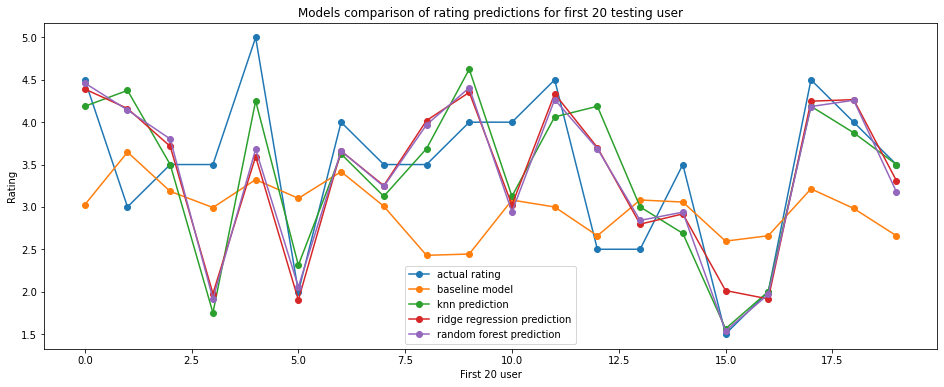

In [ ]:

def plot_prediction_plot(line0,line1,line2,line3,actual,userseq):
  f,ax = plt.subplots(1,1,figsize=(16,6))
  plt.plot(userseq[0:20],actual[0:20],label="actual rating",marker='o')
  plt.plot(userseq[0:20],line0[0:20],label="baseline model",marker='o')

  plt.plot(userseq[0:20],line1[0:20],label="knn prediction",marker='o')
  plt.plot(userseq[0:20], line2[0:20],label="ridge regression prediction",marker='o')
  plt.plot(userseq[0:20],line3[0:20],label="random forest prediction",marker='o')
 
  plt.ylabel('Rating')
  plt.xlabel('First 20 user')
  plt.title('Models comparison of rating predictions for first 20 testing user')
  plt.legend()
  plt.show() 
plot_prediction_plot(test_preds_mf,y_test_pred_knn,y_test_pred_ridge,y_test_pred_rf,testingY.values,list(range(0,len(y_test_pred))))

Take a closer look on the mis-predicted user - the 9th user 
Explore the user - movie 

In [ ]:
testingX.iloc[12]
merge_rating.iloc[67217]


Unnamed: 0                             67217
movieId                                 5445
title                 Minority Report (2002)
userId                                   414
rating                                     5
matrix_fact_predit                   2.22626
similarMovie1                            3.5
similarMovie2                              3
similarMovie3                              4
similarUser1                               4
similarUser2                             3.5
similarUser3                             2.5
user_rating_avg                      3.39196
movie_rating_avg                      3.6375
Name: 67217, dtype: object

146       4.0
281       3.0
361       4.0
414       2.0
502       3.0
         ... 
100691    4.0
100701    4.0
100705    3.5
100762    2.5
100799    3.5
Name: rating, Length: 2698, dtype: float64


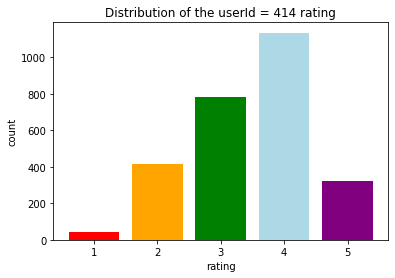

0.8799110452186805


In [ ]:
total = merge_rating.iloc[67217]
user_outlier = merge_rating[merge_rating["userId"]==414]["rating"]
print(user_outlier)
movieId_outlier = merge_rating[merge_rating["userId"]==414]["movieId"]
stats_rating_outlier = [0,0,0,0,0]
for rate in user_outlier:
  if (rate<=1):
    stats_rating_outlier[0]+=1
  if (rate<=2 and rate>1):
     stats_rating_outlier[1]+=1
  if (rate<=3 and rate>2):
     stats_rating_outlier[2]+=1
  if (rate<=4 and rate>3):
     stats_rating_outlier[3]+=1
  if (rate<=5 and rate>4):
     stats_rating_outlier[4]+=1


bars = ('1', '2', '3', '4', '5')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, stats_rating_outlier,color=["red","orange","green","lightblue","purple"])
plt.title("Distribution of the userId = 414 rating")
plt.xlabel("rating")
plt.ylabel("count")
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()
print (1-(stats_rating_outlier[4])/sum(stats_rating_outlier))

In [ ]:
np.array(movieId_outlier)

array([     1,      2,      3, ..., 180985, 184791, 187595])

In [ ]:
merge_rating[merge_rating["movieId"] == 5445]

,Unnamed: 0,movieId,title,userId,rating,matrix_fact_predit,similarMovie1,similarMovie2,similarMovie3,similarUser1,similarUser2,similarUser3,user_rating_avg,movie_rating_avg
67135,67135,5445,Minority Report (2002),7,4.0,3.690461,3.0,4.5,4.0,3.5,4.0,4.0,3.230263,3.6375
67136,67136,5445,Minority Report (2002),9,4.0,3.423342,5.0,1.0,4.0,3.5,2.0,2.0,3.260870,3.6375
67137,67137,5445,Minority Report (2002),15,4.0,3.687907,3.0,4.0,5.0,3.0,3.5,3.5,3.448148,3.6375
67138,67138,5445,Minority Report (2002),18,4.0,3.186452,4.0,4.5,3.5,3.5,4.0,4.5,3.732072,3.6375
67139,67139,5445,Minority Report (2002),20,4.5,3.866852,3.0,4.5,5.0,4.0,4.0,2.5,3.590909,3.6375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67250,67250,5445,Minority Report (2002),599,2.5,2.800206,3.0,2.0,2.5,3.5,4.0,2.5,2.642050,3.6375
67251,67251,5445,Minority Report (2002),601,4.0,2.172985,4.5,5.0,5.0,4.5,4.5,3.0,4.425743,3.6375
67252,67252,5445,Minority Report (2002),606,4.0,2.008988,3.5,3.0,3.5,2.5,4.0,3.5,3.657399,3.6375
67253,67253,5445,Minority Report (2002),608,4.5,3.263961,4.5,4.5,4.0,4.0,3.5,4.0,3.134176,3.6375


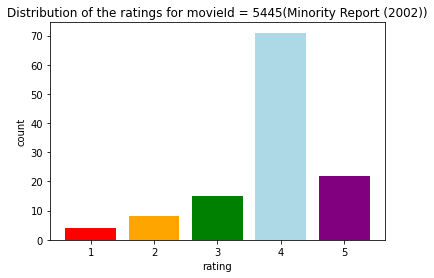

0.18333333333333332


In [ ]:
movie_list= movies[movies["movieId"].isin(movieId_outlier)]["genres"]
movie_outlier = merge_rating[merge_rating["movieId"]==5445]
movie_rating_list = movie_outlier["rating"]
#
movie_rating_list
stats_rating_outlier=[0,0,0,0,0]
for rate in movie_rating_list:
  if (rate<=1):
    stats_rating_outlier[0]+=1
  if (rate<=2 and rate>1):
     stats_rating_outlier[1]+=1
  if (rate<=3 and rate>2):
     stats_rating_outlier[2]+=1
  if (rate<=4 and rate>3):
     stats_rating_outlier[3]+=1
  if (rate<=5 and rate>4):
     stats_rating_outlier[4]+=1


bars = ('1', '2', '3', '4', '5')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, stats_rating_outlier,color=["red","orange","green","lightblue","purple"])
plt.title("Distribution of the ratings for movieId = 5445(Minority Report (2002))")
plt.xlabel("rating")
plt.ylabel("count")
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()


#Parameter tuning plot

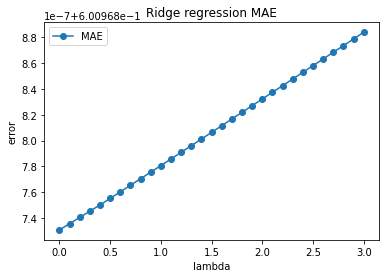

In [ ]:

def plot_ridge_accuracies(rmse,mae,hyperparams):
  #plt.plot(hyperparams,rmse,label="RMSE",marker='o')
  plt.plot(hyperparams, mae,label="MAE",marker='o')
  plt.ylabel('error')
  plt.xlabel('lambda')
  plt.title('Ridge regression MAE')
  plt.legend()
  plt.show() 
plot_ridge_accuracies(rmse_ridge,mae_ridge,hyperparams)


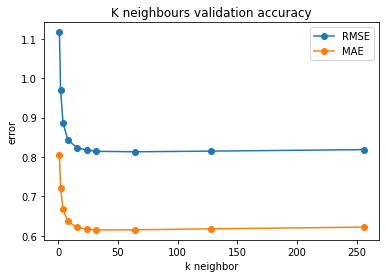

In [ ]:
def plot_knn_accuracies(rmse,mae,hyperparams):
  plt.plot(hyperparams,rmse,label="RMSE",marker='o')
  plt.ylabel('error')
  plt.xlabel('k neighbor')
  plt.plot(hyperparams, mae,label="MAE",marker='o')
  plt.legend()
  plt.title('K neighbours validation accuracy')
  plt.show() 
plot_knn_accuracies(rmse_K,mae_K,hyperparams_k)




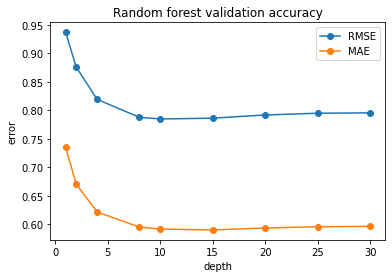

In [ ]:
def plot_rf_accuracies(rmse,mae,hyperparams):
  plt.plot(hyperparams,rmse,label="RMSE",marker='o')
  plt.plot(hyperparams, mae,label="MAE",marker='o')
  plt.ylabel('error')
  plt.xlabel('depth')
  plt.title('Random forest validation accuracy')
  plt.legend()
  plt.show() 
plot_rf_accuracies(rmse_rf,mae_rf,depth)

Test on only collaborative learning/ contentent learning/ average / hybrid 

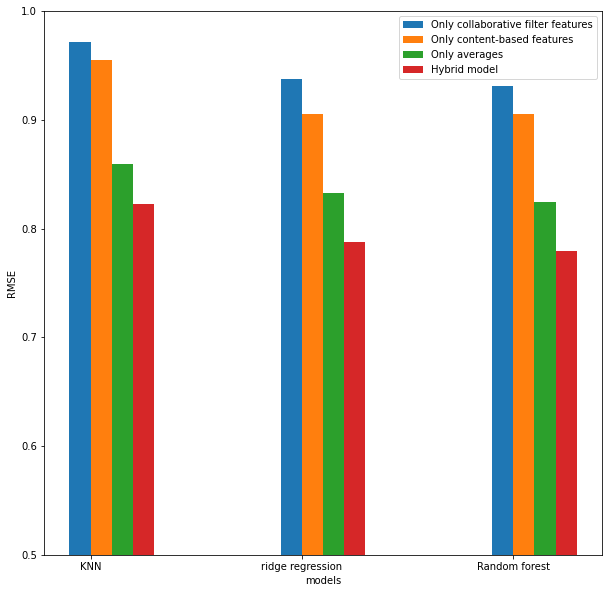

In [ ]:
N = 3

only_similar_users = [0.9713190907517594, 0.9379208312744081, 0.9310010456760595]
only_similar_movies= [0.9554112020527771, 0.9054181097197858, 0.9056947797038446]
only_average_data = [ 0.8593602398101952, 0.8329874450894343, 0.8240920703235542]

hybrid_data = [0.822613451645519, 0.7879353190756577, 0.7797844739556792]
f,ax = plt.subplots(1,1,figsize=(10,10))

ind = np.arange(N) 
width = 0.1       
plt.bar(ind, only_similar_users, width, label='Only collaborative filter features')
plt.bar(ind + width, only_similar_movies, width,
    label='Only content-based features')
plt.bar(ind+2*width, only_average_data, width, label='Only averages')
plt.bar(ind+3*width , hybrid_data, width,
    label='Hybrid model')
plt.xlabel('models')
plt.ylabel('RMSE')
plt.ylim((0.5, 1))   # set the ylim to bottom, top

plt.xticks(ind + width / 2, ('KNN', 'ridge regression', 'Random forest'))
plt.legend(loc='best')
plt.show()